In [9]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


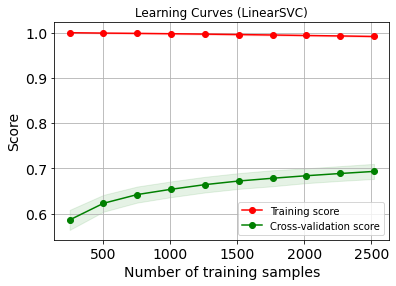

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,ShuffleSplit, GridSearchCV, learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, n_jobs=4, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Number of training samples', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.tick_params(labelsize=14)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


dir = "/content/drive/My Drive/Colab Notebooks/train/"
# groups = [f for f in os.listdir(dir)]
# train_all  = []
# length = []

# for group in groups:
#     lines = open(dir+str(group)).readlines()
#     data = [line for line in lines]
#     train_all.extend(data)
#     length.append(len(data))

# sesquiary = length[0]
# primary   = length[1]
# secondary = length[2]

# vectorizer = TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b')
# X = vectorizer.fit_transform(train_all)
# y = [0]*sesquiary + [1]*primary + [2]*secondary

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/台風豪雨福島_tokenized.xlsx')
x_train = df.Text.values.tolist()
x_train = vectorizer.fit_transform(x_train)
y_train = df.label.values.tolist()

estimator = LinearSVC()
cv = ShuffleSplit(X_train.shape[0], test_size=0.2, random_state=42)

title = 'Learning Curves (LinearSVC)'
plot_learning_curve(estimator, title, x_train, y_train, cv=cv)
plt.show()